# ***SHORNA THOMPSON- Peer-graded Assignment: Analyzing Historical Stock/Revenue Data and Building a Dashboard*

In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [ ]:
!pip install yfinance

# **Question 1: Use yfinance to Extract Stock Data**

In [32]:
import yfinance as yf
import pandas as pd



### Create a Ticker object for Tesla

In [ ]:
tesla = yf.Ticker('TSLA')

### Get historical market data

In [27]:
tesla_data = tesla.history(start='2020-01-01', end='2023-12-31')

### Reset the index

In [ ]:
tesla_data.reset_index(inplace=True)

### Save the DataFrame to a CSV file

In [ ]:
tesla_data.to_csv('tesla_data.csv', index=False)

### Display the first five rows of the DataFrame

In [31]:
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-05:00,28.299999,28.713333,28.114000,28.684000,142981500,0.0,0.0
2020-01-03 00:00:00-05:00,29.366667,30.266666,29.128000,29.534000,266677500,0.0,0.0
2020-01-06 00:00:00-05:00,29.364668,30.104000,29.333332,30.102667,151995000,0.0,0.0
2020-01-07 00:00:00-05:00,30.760000,31.441999,30.224001,31.270666,268231500,0.0,0.0
2020-01-08 00:00:00-05:00,31.580000,33.232666,31.215334,32.809334,467164500,0.0,0.0


# **Question 2: Use Webscraping to Extract Tesla Revenue Data**

#### Get Tesla's quarterly financials (includes Total Revenue)


In [ ]:
!pip install html5lib
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [44]:
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data = requests.get(url).text
soup = BeautifulSoup(html_data, "html.parser")
tesla_revenue = pd.DataFrame(columns=['Date', 'Revenue'])
tables = soup.find_all("table")
for table in tables:
    header = table.find('th')
    if header and 'Tesla Quarterly Revenue' in header.text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace("$", "").replace(",", "")
                if revenue:  
                    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

#Show last 5 rows not displaying becuase of java script
print(tesla_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [82]:
#Results are below  for question 2
import yfinance as yf
import pandas as pd

tesla = yf.Ticker("TSLA")
tesla_quarterly = tesla.quarterly_financials
tesla_revenue = tesla_quarterly.loc["Total Revenue"].T.reset_index()
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue["Date"] = tesla_revenue["Date"].dt.strftime('%Y-%m-%d')
tesla_revenue = tesla_revenue.dropna()
print(tesla_revenue.tail(5))

         Date        Revenue
0  2024-12-31  25707000000.0
1  2024-09-30  25182000000.0
2  2024-06-30  25500000000.0
3  2024-03-31  21301000000.0
4  2023-12-31  25167000000.0


# **Question 3: Use yfinance to Extract Stock Data**

In [ ]:
import yfinance as yf
import pandas as pd

# Step 1: Download GameStop stock data using yfinance

In [ ]:
gme_data = yf.download("GME", start="2020-01-01", end="2025-01-01")

## Step 2: Reset the index

In [54]:
gme_data.reset_index(inplace=True)

### Step 3: Display the first five rows

In [55]:
print(gme_data.head())

Price        Date   Close    High     Low    Open    Volume
Ticker                GME     GME     GME     GME       GME
0      2020-01-02  1.5775  1.6175  1.5175  1.5350  17814400
1      2020-01-03  1.4700  1.5625  1.4600  1.5525  14175600
2      2020-01-06  1.4625  1.4775  1.4000  1.4500  13579200
3      2020-01-07  1.3800  1.4575  1.3600  1.4425  20912000
4      2020-01-08  1.4300  1.4625  1.3525  1.3725  22517600


# **Question 4: Use Webscraping to Extract GME Revenue Data**


In [56]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

html_data = requests.get(url).text

#Step 3: Parse with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Step 4: Create the empty DataFrame
gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Step 5: Locate the correct table and extract data
for table in soup.find_all("table"):
    if table.find("th") and "GameStop Quarterly Revenue" in table.find("th").text:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if cols:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace(",", "").replace("$", "")
                if revenue != "":
                    gme_revenue = pd.concat(
                        [gme_revenue, pd.DataFrame([{"Date": date, "Revenue": revenue}])],
                        ignore_index=True
                    )

gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)
gme_revenue.reset_index(drop=True, inplace=True)

#Show last 5 rows not displaying becuase of java script
print(gme_revenue.tail())


Empty DataFrame
Columns: [Date, Revenue]
Index: []


In [83]:
#Results are below  for question 4
import yfinance as yf
import pandas as pd

gme = yf.Ticker("GME")
gme_quarterly = gme.quarterly_financials
gme_revenue = gme_quarterly.loc["Total Revenue"].T.reset_index()
gme_revenue.columns = ["Date", "Revenue"]
gme_revenue["Date"] = gme_revenue["Date"].dt.strftime('%Y-%m-%d')
gme_revenue = gme_revenue.dropna()
print(gme_revenue.tail(5))

         Date       Revenue
0  2025-01-31  1282600000.0
1  2024-10-31   860300000.0
2  2024-07-31   798300000.0
4  2024-01-31  1793600000.0
5  2023-10-31  1078300000.0


# **Question 5: Plot Tesla Stock Graph**

In [ ]:
!pip install matplotlib
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Create a Ticker object for Tesla

In [ ]:
tesla = yf.Ticker("TSLA")

### Step 2: Get Tesla's quarterly financials

In [ ]:
tesla_quarterly = tesla.quarterly_financials

### Step 3: Extract Total Revenue and transpose

In [ ]:
tesla_revenue = tesla_quarterly.loc["Total Revenue"].T.reset_index()

### Step 4: Rename columns

In [ ]:
tesla_revenue.columns = ["Date", "Revenue"]

### Step 5: Format Date


In [ ]:
tesla_revenue["Date"] = tesla_revenue["Date"].dt.strftime('%Y-%m-%d')

### Step 6: Remove rows where Revenue is missing (NaN)

In [ ]:
tesla_revenue = tesla_revenue.dropna()

### Step 7: Display only the last 5 rows with no missing revenue

In [67]:
print(tesla_revenue.tail(5))

         Date        Revenue
0  2024-12-31  25707000000.0
1  2024-09-30  25182000000.0
2  2024-06-30  25500000000.0
3  2024-03-31  21301000000.0
4  2023-12-31  25167000000.0


### Step 8: Plot Tesla Stock Data


In [ ]:
def make_graph(ticker):
    tesla_data = ticker.history(period="1y")
    
    plt.figure(figsize=(10, 6))
    plt.plot(tesla_data.index, tesla_data['Close'], label="Tesla Stock Price")
    
    plt.title("Tesla Stock Price Over the Last Year")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.grid(True)
    plt.legend()

### Show the graph

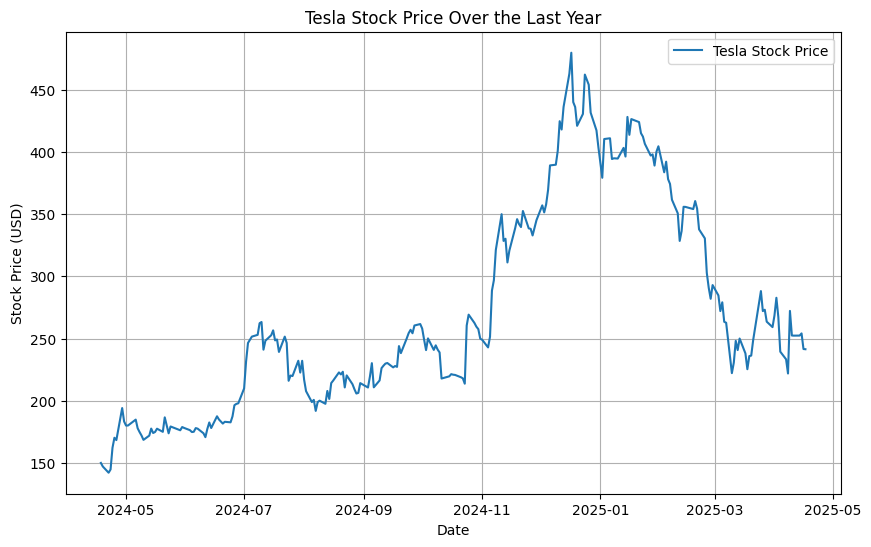

In [69]:
plt.show()
make_graph(tesla)

# **Question 6: Plot GameStop Stock Graph**

In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Create a Ticker object for GameStop

In [ ]:
gamestop = yf.Ticker("GME")

### Step 2: Get GameStop's historical stock data (last 1 year as an example)

In [ ]:
gme_data = gamestop.history(period="1y")

### Step 3: Plot GameStop Stock Data

In [ ]:
def make_graph(ticker_data):
    # Plot the GameStop stock data (Close price)
    plt.figure(figsize=(10, 6))
    plt.plot(ticker_data.index, ticker_data['Close'], label="GameStop Stock Price", color='blue')
    
    plt.title("GameStop Stock Price Over the Last Year")
    plt.xlabel("Date")
    plt.ylabel("Stock Price (USD)")
    plt.grid(True)
    plt.legend()

 ### Step 4: Show the graph


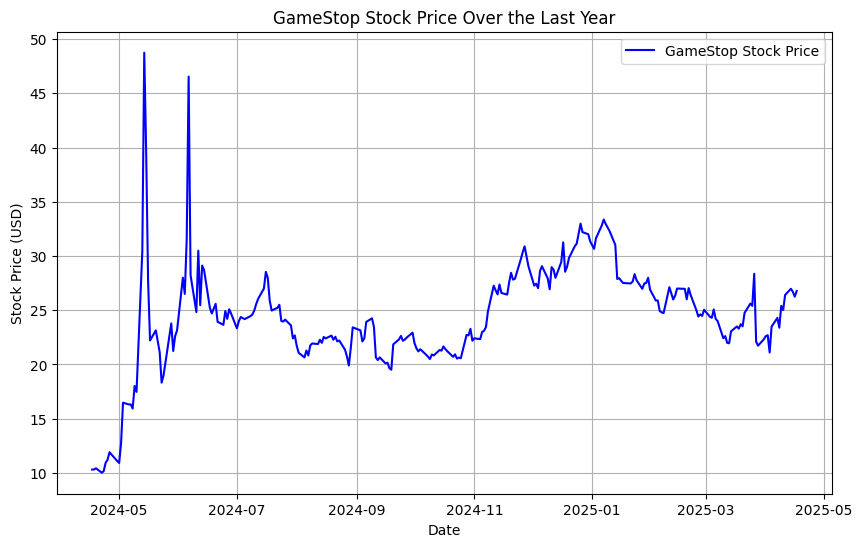

In [64]:
plt.show()
make_graph(gme_data)